# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load Dataset

In [2]:
import pandas as pd
data= pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


# Univariate Analysis

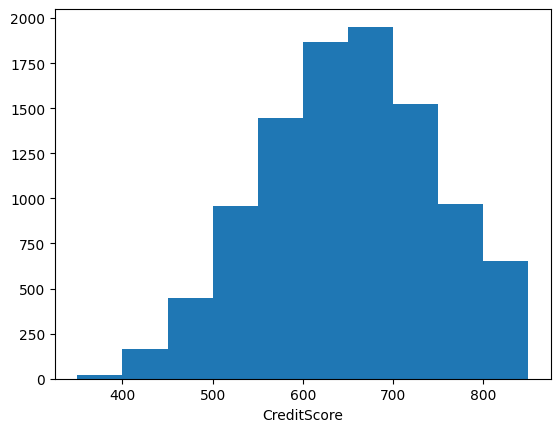

In [6]:
import matplotlib.pyplot as plt
plt.hist(data['CreditScore']);
plt.xlabel('CreditScore');

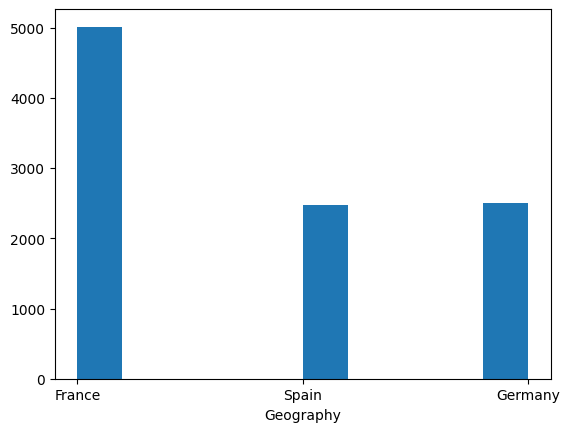

In [7]:
plt.hist(data['Geography']);
plt.xlabel('Geography');

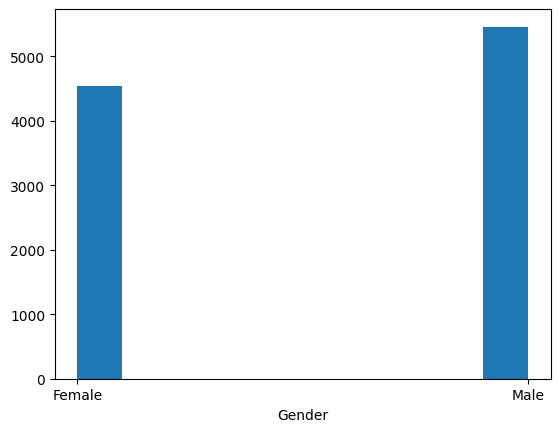

In [8]:
plt.hist(data['Gender']);
plt.xlabel('Gender');

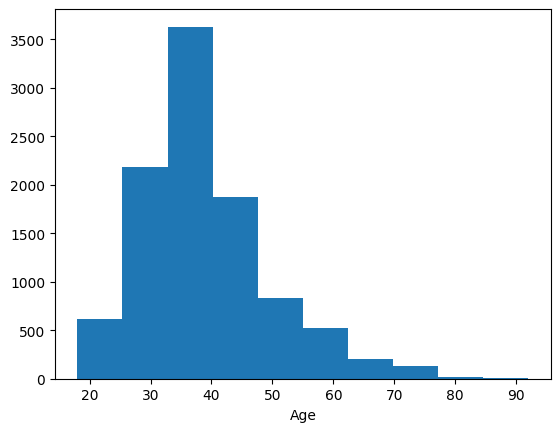

In [9]:
plt.hist(data['Age']);
plt.xlabel('Age');

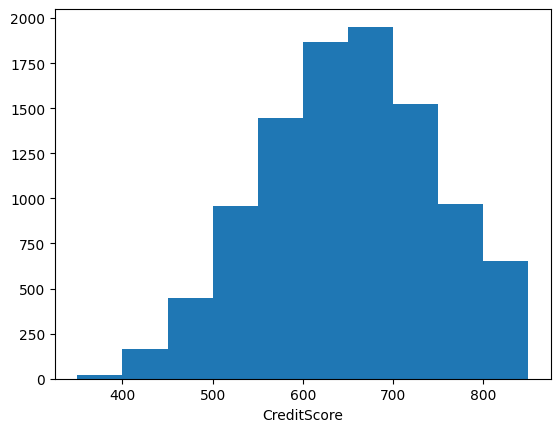

In [10]:
plt.hist(data['CreditScore']);
plt.xlabel('CreditScore');

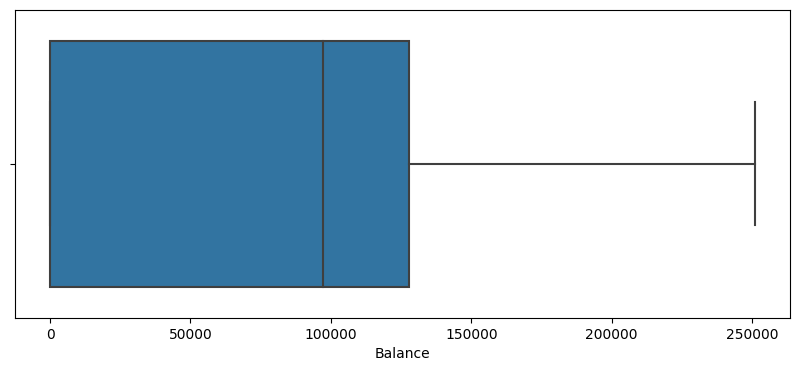

In [12]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.boxplot(x=data['Balance']);
plt.xlabel('Balance');

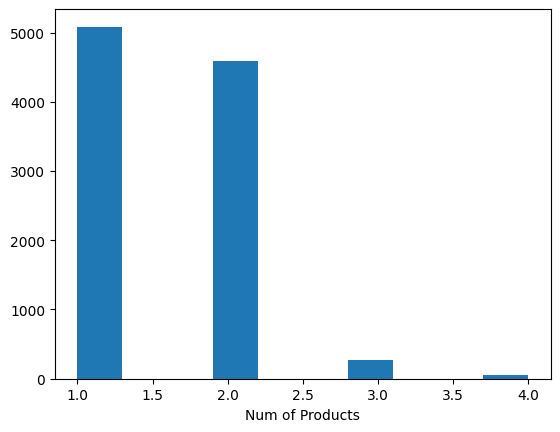

In [14]:
plt.hist(data['NumOfProducts']);
plt.xlabel('Num of Products');

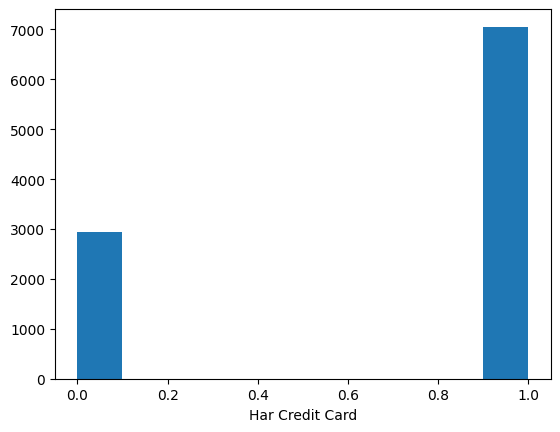

In [15]:
plt.hist(data['HasCrCard']);
plt.xlabel('Har Credit Card');

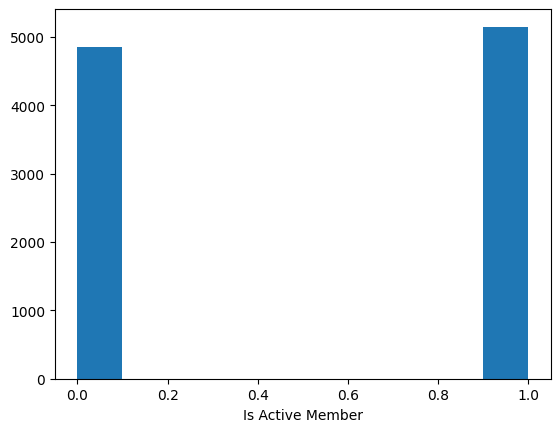

In [16]:
plt.hist(data['IsActiveMember']);
plt.xlabel('Is Active Member');

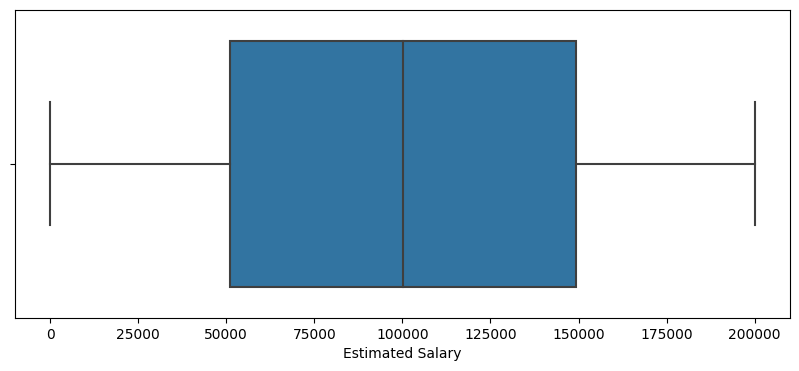

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data['EstimatedSalary']);
plt.xlabel('Estimated Salary');

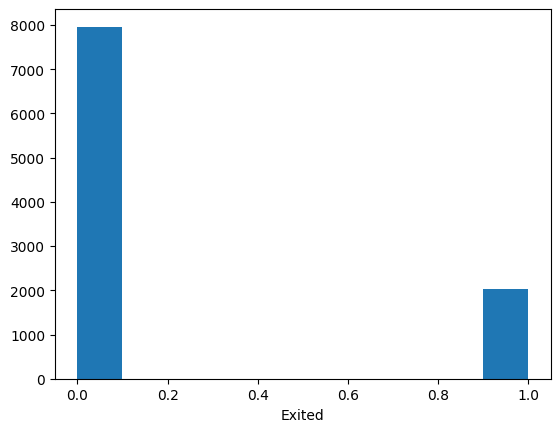

In [19]:
plt.hist(data['Exited']);
plt.xlabel('Exited');

# Bivariate Analysis

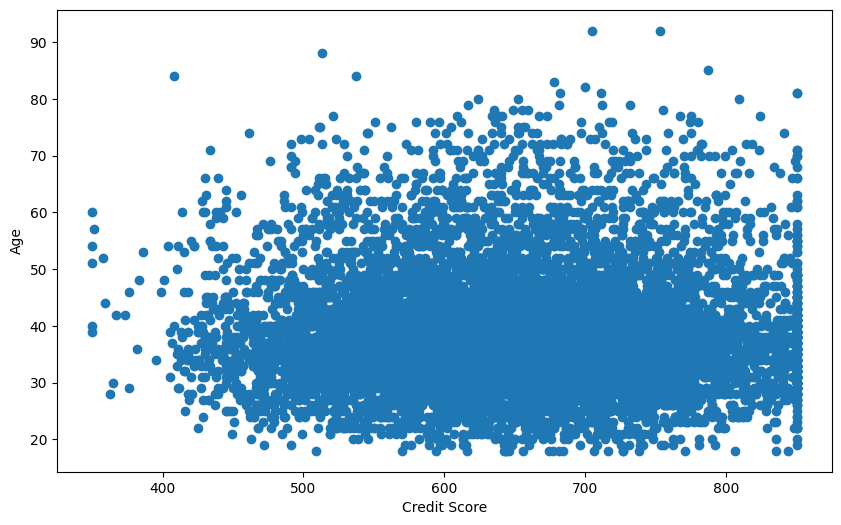

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['CreditScore'],y=data['Age']);
plt.xlabel('Credit Score');
plt.ylabel('Age');

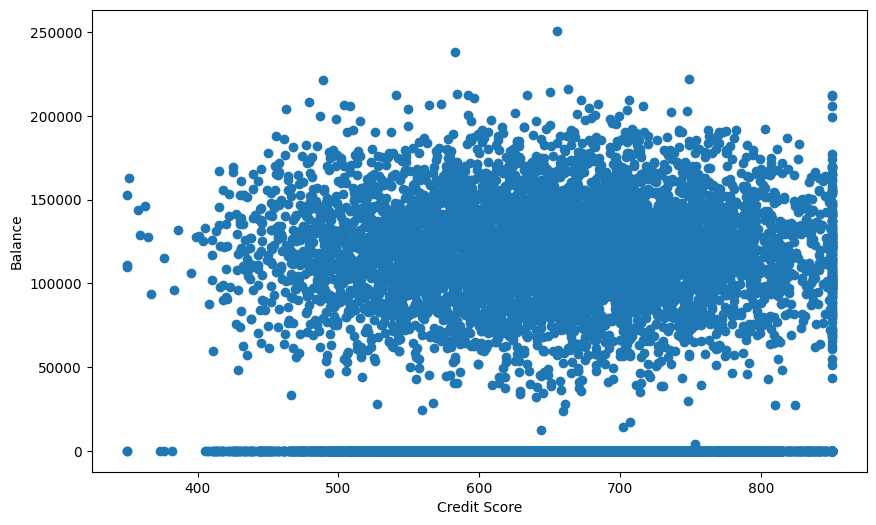

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(data['CreditScore'],data['Balance']);
plt.xlabel('Credit Score');
plt.ylabel('Balance');

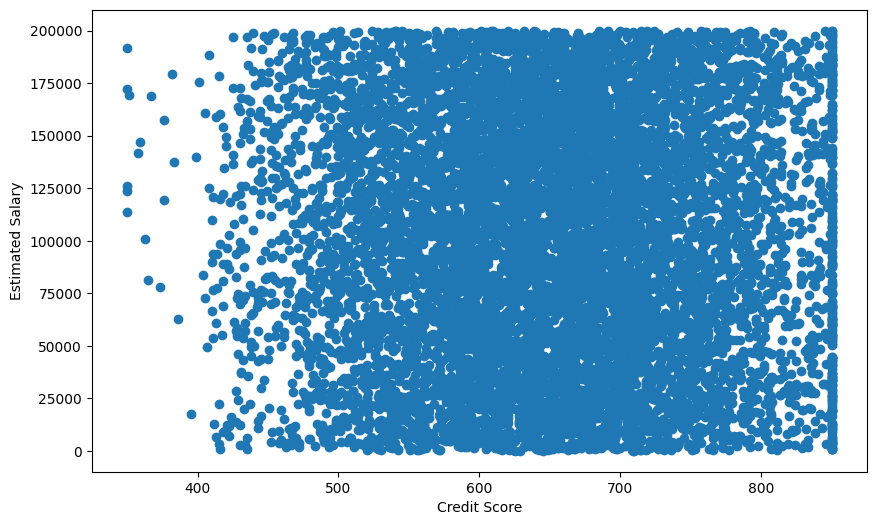

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['CreditScore'],y=data['EstimatedSalary']);
plt.xlabel('Credit Score');
plt.ylabel('Estimated Salary');

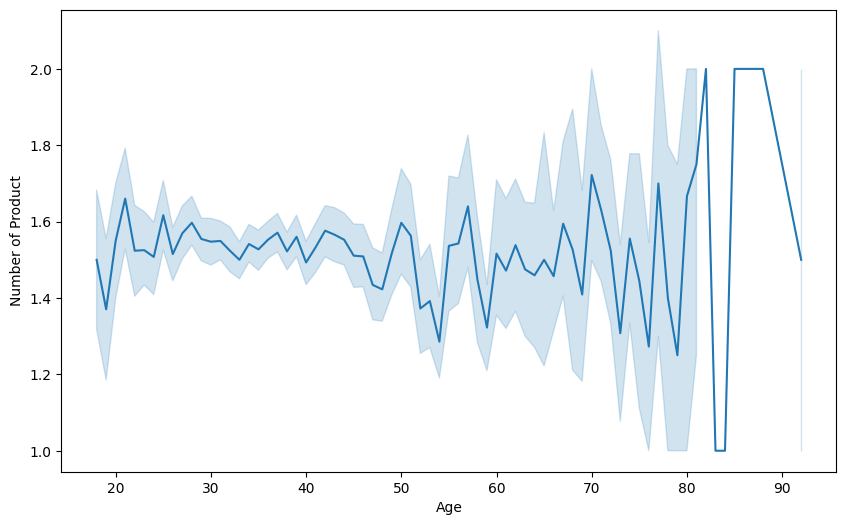

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data["Age"],y=data["NumOfProducts"]);
plt.xlabel('Age');
plt.ylabel('Number of Product');

# Multivariate Analysis

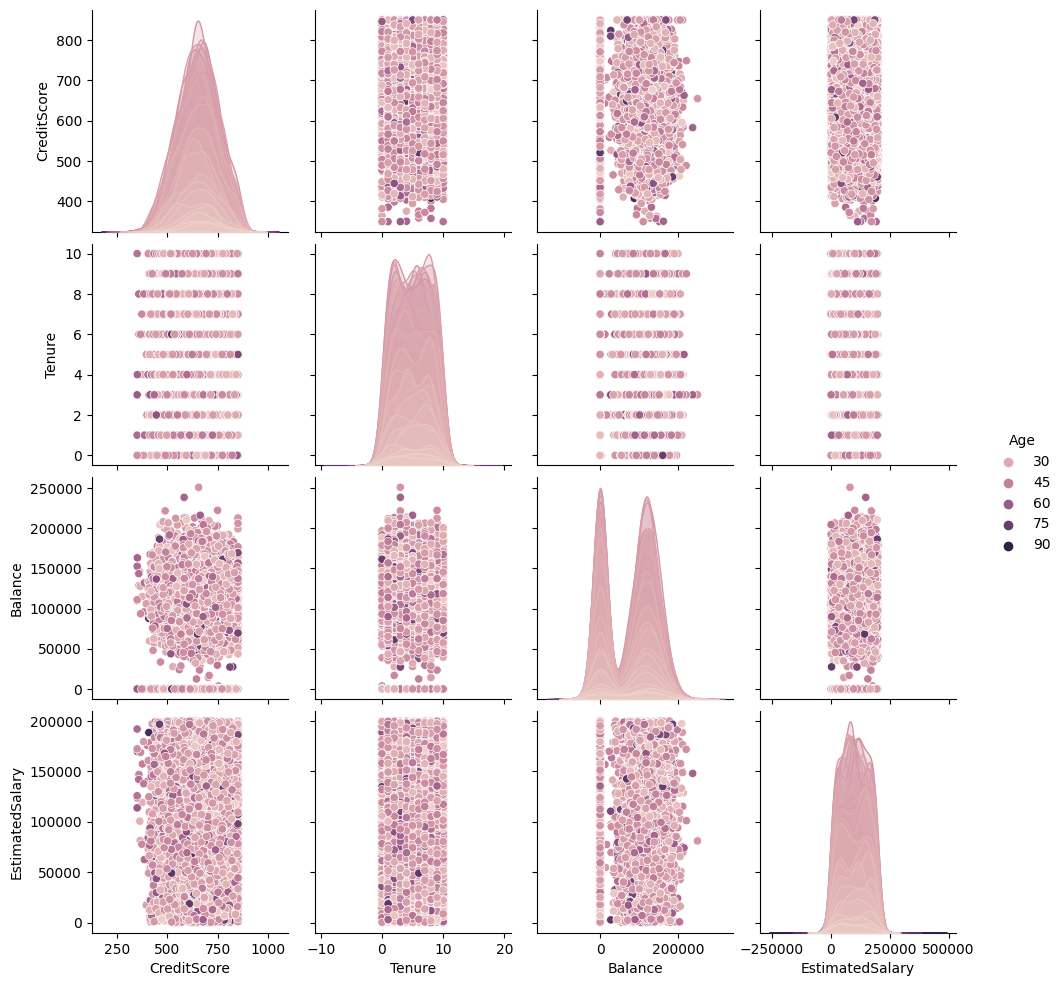

In [24]:
sns.pairplot(data[['CreditScore','Age','Gender','Tenure','Balance','EstimatedSalary']],hue='Age');

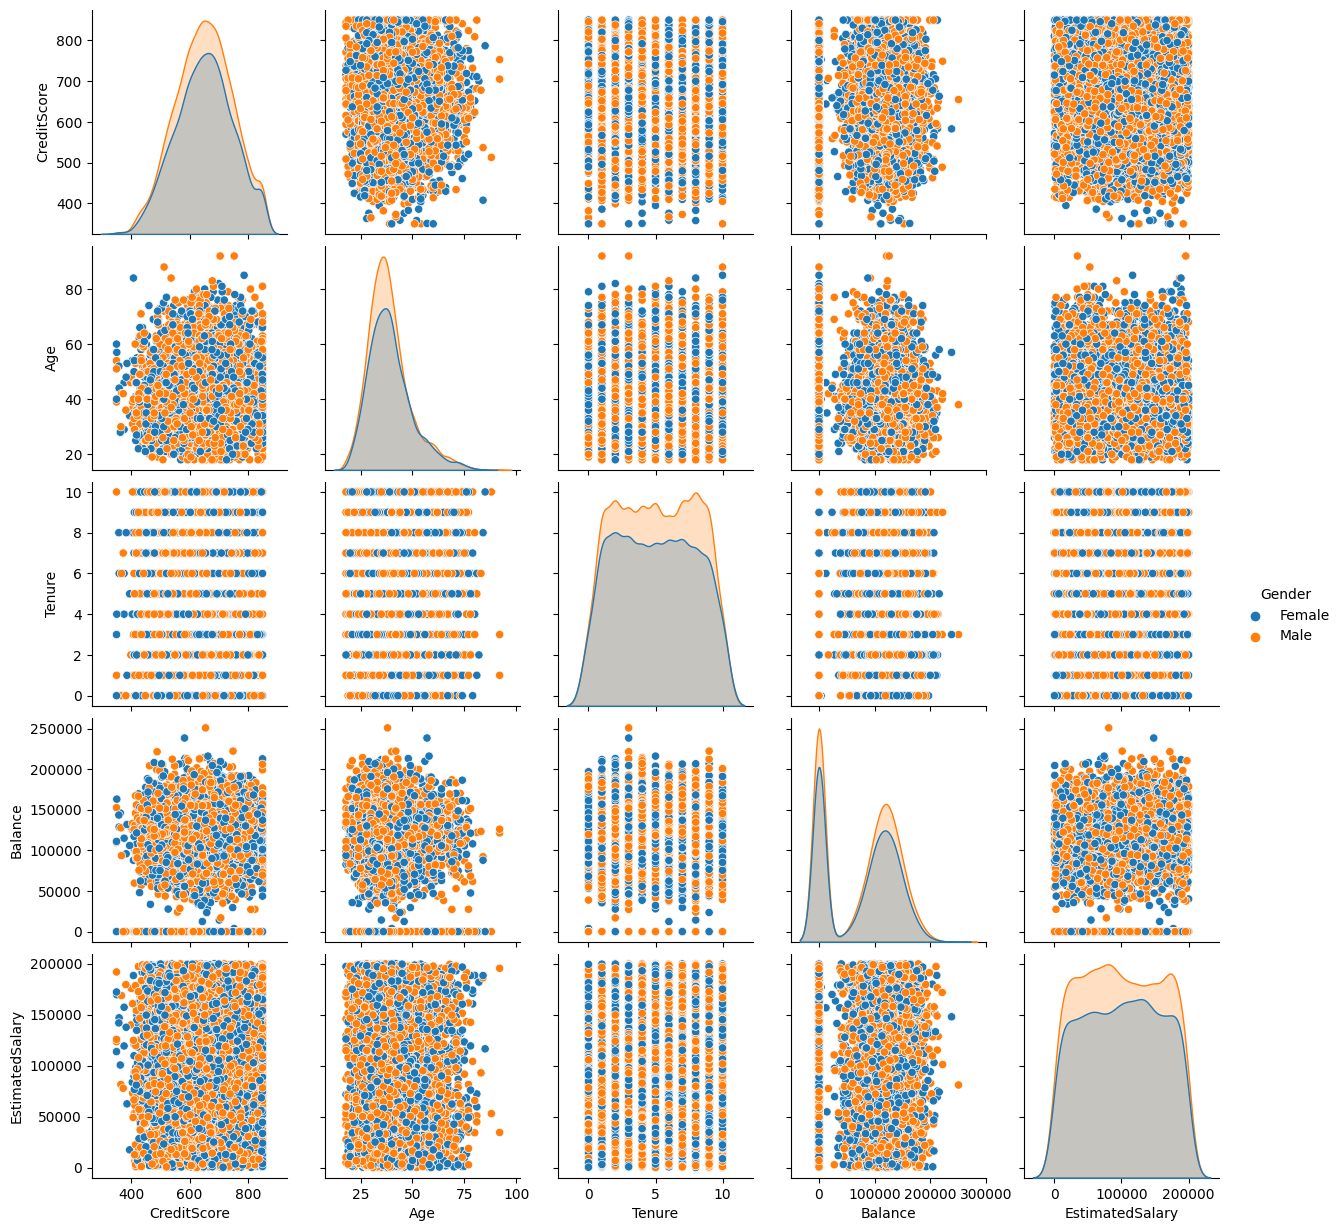

In [25]:
sns.pairplot(data[['CreditScore','Age','Gender','Tenure','Balance','EstimatedSalary']],hue='Gender');

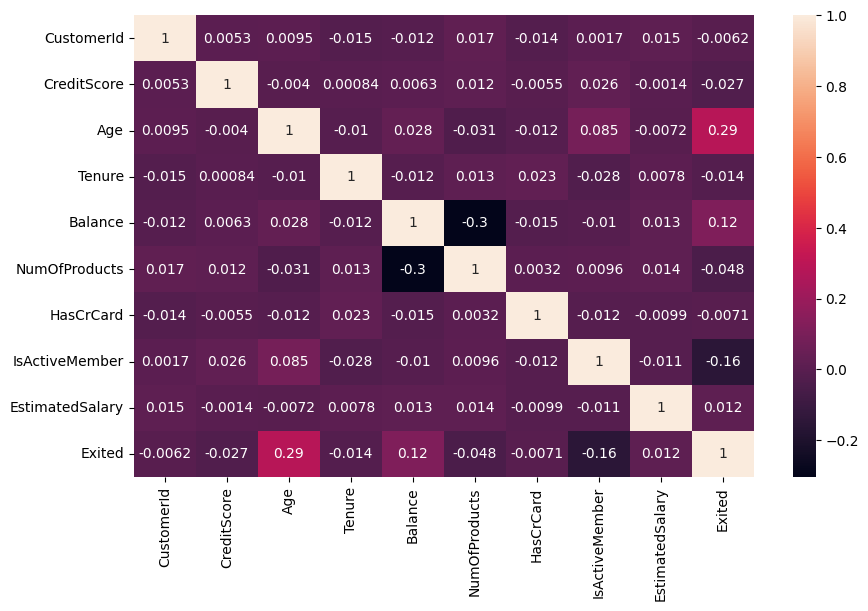

In [26]:
plt.figure(figsize=(10,6));
sns.heatmap(data.corr(),annot=True);

# Descriptive Statistics

In [27]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Handling Missing Values

In [28]:
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Outlier Handling

In [30]:
import numpy as np
def Flooring_outlier(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    data[col]=np.where(data[col]>upper_whisker,upper_whisker,np.where(data[col]<lower_whisker,lower_whisker,data[col]))

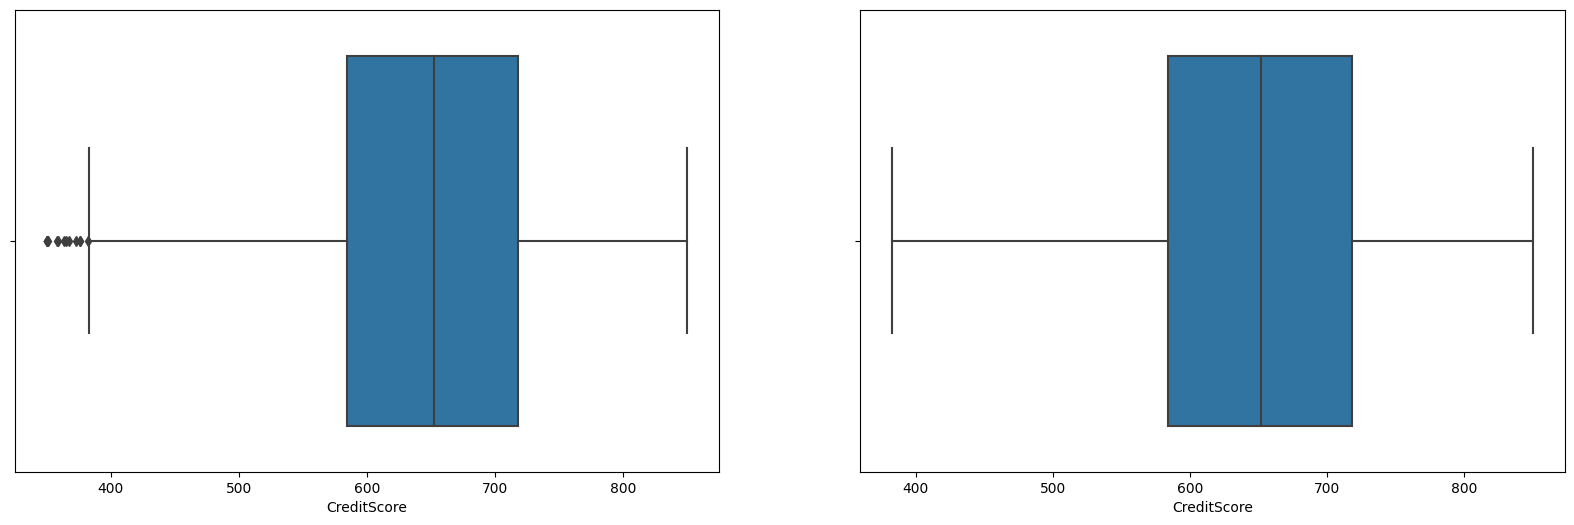

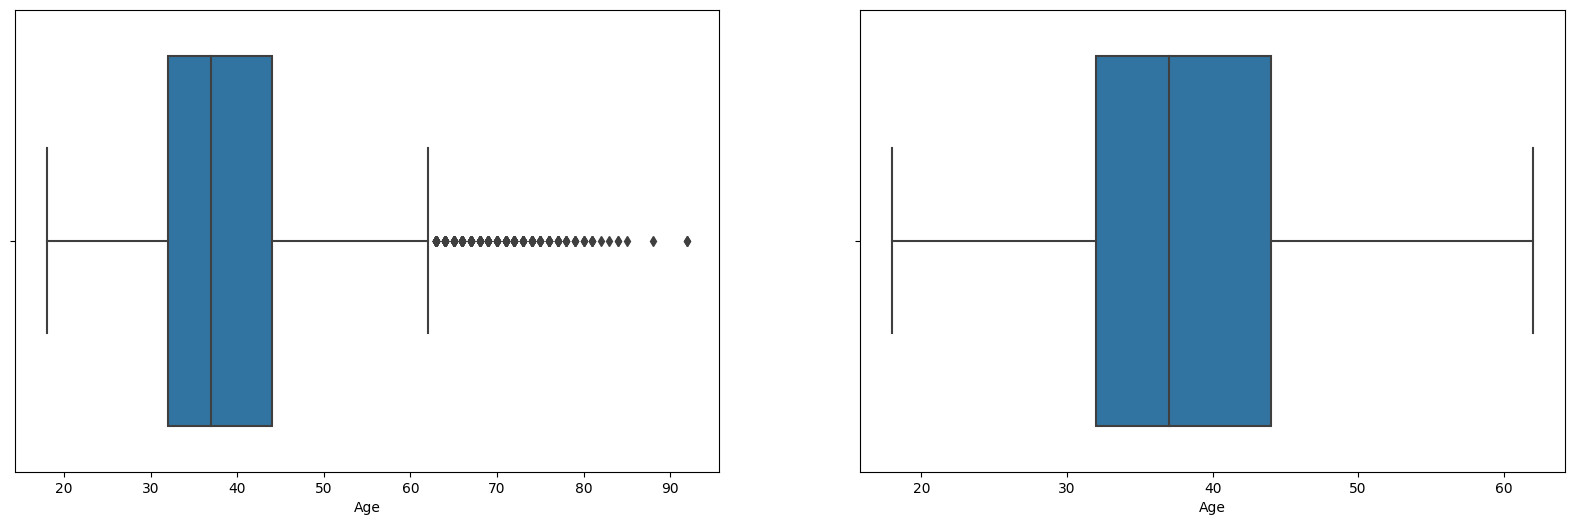

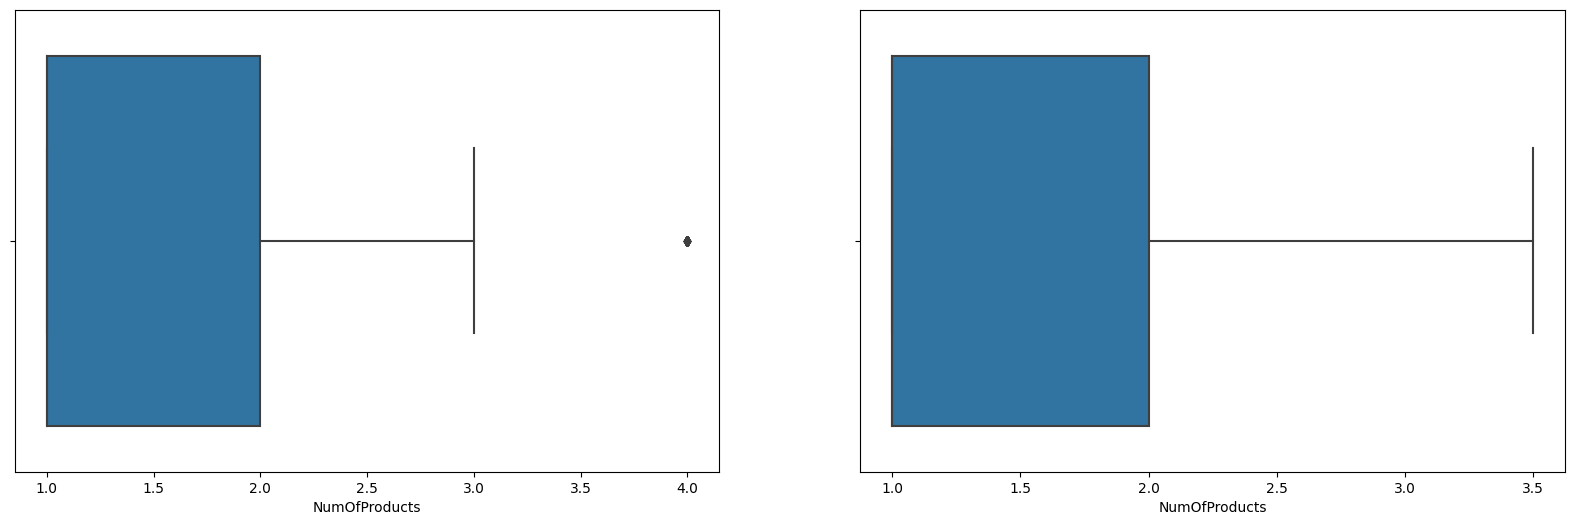

In [31]:
import numpy as np
def remove_outlier(col):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    sns.boxplot(ax=axes[0], data=data, x=col)
    Flooring_outlier(col)
    sns.boxplot(ax=axes[1], data=data, x=col)

for col in ['CreditScore', 'Age', 'NumOfProducts']:
    remove_outlier(col)

In [32]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771.0,France,Male,39.0,5,0.00,2.0,1,0,96270.64,0
9997,15569892,Johnstone,516.0,France,Male,35.0,10,57369.61,1.0,1,1,101699.77,0
9998,15584532,Liu,709.0,France,Female,36.0,7,0.00,1.0,0,1,42085.58,1


# Encoding Of Categorical Columns

In [33]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [35]:
data = pd.get_dummies(data, columns = ['Geography', 'Gender'])

In [36]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

# Split data into dependent and independent data

In [37]:
Y = data[['Exited']]
X = data.drop('Exited', axis=1)
X = data.drop('Surname',axis=1)

In [39]:
X

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,,
1,15634602,619.0,42.0,2,0.00,1.0,1,1,101348.88,1,1,0,0,1,0
2,15647311,608.0,41.0,1,83807.86,1.0,0,1,112542.58,0,0,0,1,1,0
3,15619304,502.0,42.0,8,159660.80,3.0,1,0,113931.57,1,1,0,0,1,0
4,15701354,699.0,39.0,1,0.00,2.0,0,0,93826.63,0,1,0,0,1,0
5,15737888,850.0,43.0,2,125510.82,1.0,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771.0,39.0,5,0.00,2.0,1,0,96270.64,0,1,0,0,0,1
9997,15569892,516.0,35.0,10,57369.61,1.0,1,1,101699.77,0,1,0,0,0,1
9998,15584532,709.0,36.0,7,0.00,1.0,0,1,42085.58,1,1,0,0,1,0


In [40]:
Y

,Exited
RowNumber,
1,1
2,0
3,1
4,0
5,0
...,...
9996,0
9997,0
9998,1


# Scale the independent column

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.78321342, -0.32687761,  0.34261499, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.60653412, -0.44080365,  0.24001108, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-0.99588476, -1.53863634,  0.34261499, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [-1.47928179,  0.60524449, -0.27300849, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.11935577,  1.25772996,  0.34261499, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [-0.87055909,  1.4648682 , -1.09383981, ..., -0.57380915,
         1.09598752, -1.09598752]])

# Split the data into training and testing

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7000, 15), (3000, 15), (7000, 1), (3000, 1))